In [2]:
import pandas as pd
import seaborn

In [3]:
X = pd.read_parquet('data/mitbih/train/X.parquet')
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y = pd.read_parquet('data/mitbih/train/y.parquet').squeeze()
y.head(3)

0    0
1    0
2    0
Name: 187, dtype: int32

### Target
 - 0: N - Normal
 - 1: S - Premature
 - 2: V - Ventricular
 - 3: F - Fusion of V and N
 - 4: Q - Paced, fusion of paced and N, **other**

#### Conclusions
- Gravely imbalanced
- Q-class (4) actually contains multiple types: paced and unclassifiable; this could confuse a model


In [13]:
y.value_counts()

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

<Axes: xlabel='187'>

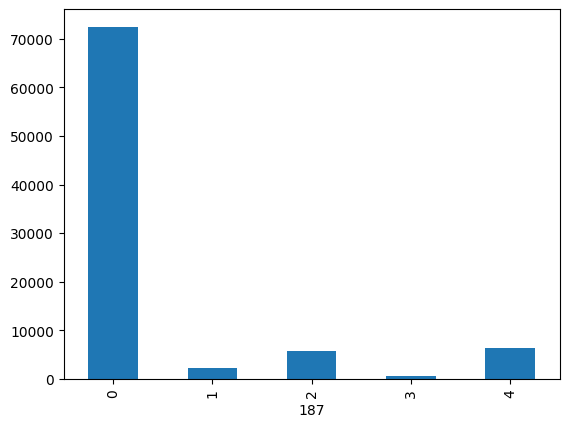

In [14]:
y.value_counts().sort_index().plot.bar()

### X
#### Conclusions
- Differing lengths but already zero padded.
- ALready scaled into [0,1].
- Vastly different looking to the naked eye.
- Different frequencies?
- Varying magnitudes.
- Varying resolutions.

<Axes: >

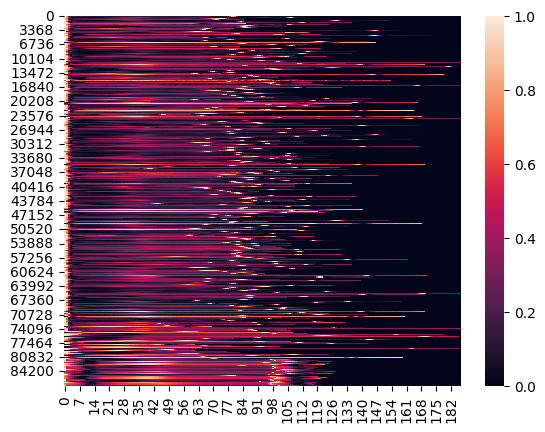

In [41]:
seaborn.heatmap(X)

<Axes: >

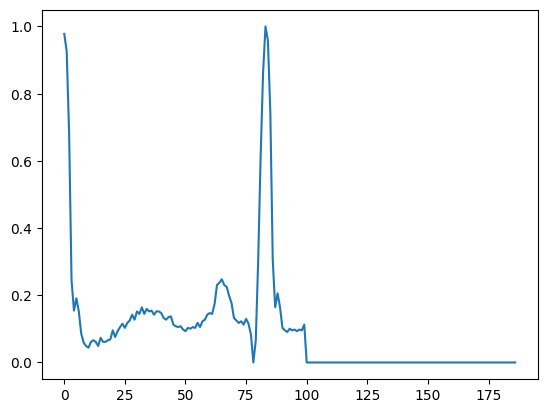

In [43]:
X.iloc[0].plot()

<Axes: >

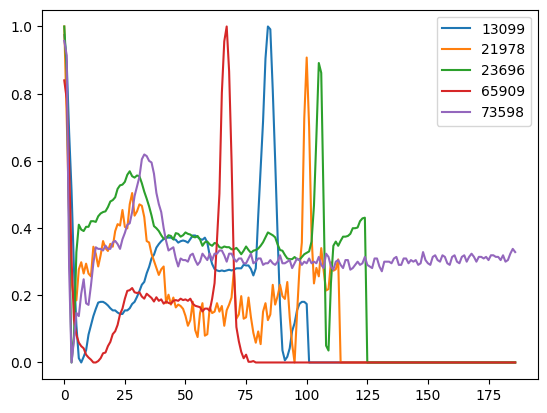

In [16]:
# X.sample(5, axis=0).T.plot()
X.loc[[13099, 21978, 23696, 65909, 73598]].T.plot()

In [20]:
X.stack().describe()

count    1.637260e+07
mean     1.742830e-01
std      2.263274e-01
min      0.000000e+00
25%      0.000000e+00
50%      8.296943e-02
75%      2.891566e-01
max      1.000000e+00
dtype: float64

<Axes: >

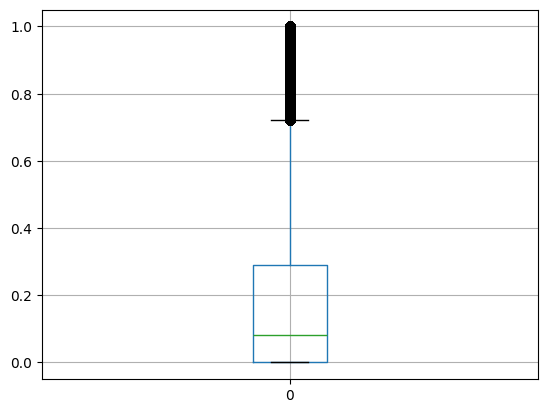

In [22]:
X.stack().to_frame().boxplot()